In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar los datos
file_path = "C:/Users/gonza/OneDrive/Desktop/machine learning/imdb_anime.xlsx"
df = pd.read_excel(file_path)

In [3]:
# Mostrar las primeras filas del dataset
df.head()

,Title,Genre,User Rating,Number of Votes,Runtime,Year,Summary,Stars,Certificate,Metascore,Gross,Episode,Episode Title
0,One Piece,"Animation, Action, Adventure",8.9,187689,24 min,(1999– ),Follows the adventures of Monkey D. Luffy and ...,"Mayumi Tanaka,Laurent Vernin,Akemi Okamura,Ton...",TV-14,NaN,187689,0,NaN
1,Teenage Mutant Ninja Turtles: Mutant Mayhem,"Animation, Action, Adventure",7.4,28895,99 min,-2023,The film follows the Turtle brothers as they w...,NaN,PG,74,28895,0,NaN
2,The Super Mario Bros. Movie,"Animation, Adventure, Comedy",7.1,189108,92 min,-2023,A plumber named Mario travels through an under...,NaN,PG,46,189108,0,NaN
3,Attack on Titan,"Animation, Action, Adventure",9.1,434457,24 min,(2013–2023),After his hometown is destroyed and his mother...,"Josh Grelle,Bryce Papenbrook,Yûki Kaji,Yui Ish...",TV-MA,NaN,434457,0,NaN
4,Jujutsu Kaisen,"Animation, Action, Adventure",8.5,82909,24 min,(2020– ),A boy swallows a cursed talisman - the finger ...,"Junya Enoki,Yûichi Nakamura,Adam McArthur,Yuma...",TV-MA,NaN,82909,0,NaN


In [4]:
# Verificar valores nulos en el dataset
missing_values = df.isnull().sum()

In [5]:
# Verificar tipos de datos de cada columna
data_types = df.dtypes

In [6]:
# Resumen de valores nulos y tipos de datos
quality_report = pd.DataFrame({
    "Tipo de Dato": data_types,
    "Valores Nulos": missing_values,
    "Porcentaje Nulos (%)": (missing_values / len(df)) * 100
})

In [7]:
# Mostrar el reporte de calidad de datos
display(quality_report)

,Tipo de Dato,Valores Nulos,Porcentaje Nulos (%)
Title,object,0,0.000000
Genre,object,0,0.000000
User Rating,object,20708,45.296061
Number of Votes,object,20708,45.296061
Runtime,object,13168,28.803290
Year,object,126,0.275609
Summary,object,22170,48.493996
Stars,object,32041,70.085526
Certificate,object,17023,37.235602
Metascore,object,45376,99.254107


In [8]:
# Eliminar la columna Metascore debido al alto porcentaje de valores nulos
df.drop(columns=["Metascore"], inplace=True)

In [9]:
# Rellenar valores nulos en columnas categóricas con "Unknown"
categorical_cols = ["Stars", "Certificate", "Summary", "Episode Title"]
df[categorical_cols] = df[categorical_cols].fillna("Unknown")

In [10]:
# Convertir columnas numéricas a tipo float, forzando errores a NaN
numeric_cols = ["User Rating", "Number of Votes", "Runtime", "Gross", "Year"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convertir a número, forzando errores a NaN


In [11]:
# Imputar valores nulos con la mediana de cada columna
for col in numeric_cols:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)  # Asignar directamente en el DataFrame

In [12]:
print(df.isnull().sum())

Title                  0
Genre                  0
User Rating            0
Number of Votes        0
Runtime            45717
Year                   0
Summary                0
Stars                  0
Certificate            0
Gross                  0
Episode                0
Episode Title          0
dtype: int64


In [13]:
# Mostrar los primeros valores originales de Runtime
print(df["Runtime"].head(20))


0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
Name: Runtime, dtype: float64


In [14]:
# Extraer valores numéricos de "Runtime" asegurando que no haya problemas
df["Runtime"] = df["Runtime"].astype(str).str.extract(r'(\d+)')

# Verificar valores extraídos
print(df["Runtime"].head(20))

# Convertir a número, reemplazando cualquier error por NaN
df["Runtime"] = pd.to_numeric(df["Runtime"], errors='coerce')

# Si sigue habiendo solo NaN, usar un valor fijo (ej. mediana de otros animes similares)
if df["Runtime"].notnull().sum() == 0:
    df["Runtime"] = 24  # Valor típico de episodios de anime

# Verificar nuevamente los valores nulos
print(df["Runtime"].isnull().sum())


0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
Name: Runtime, dtype: object
0


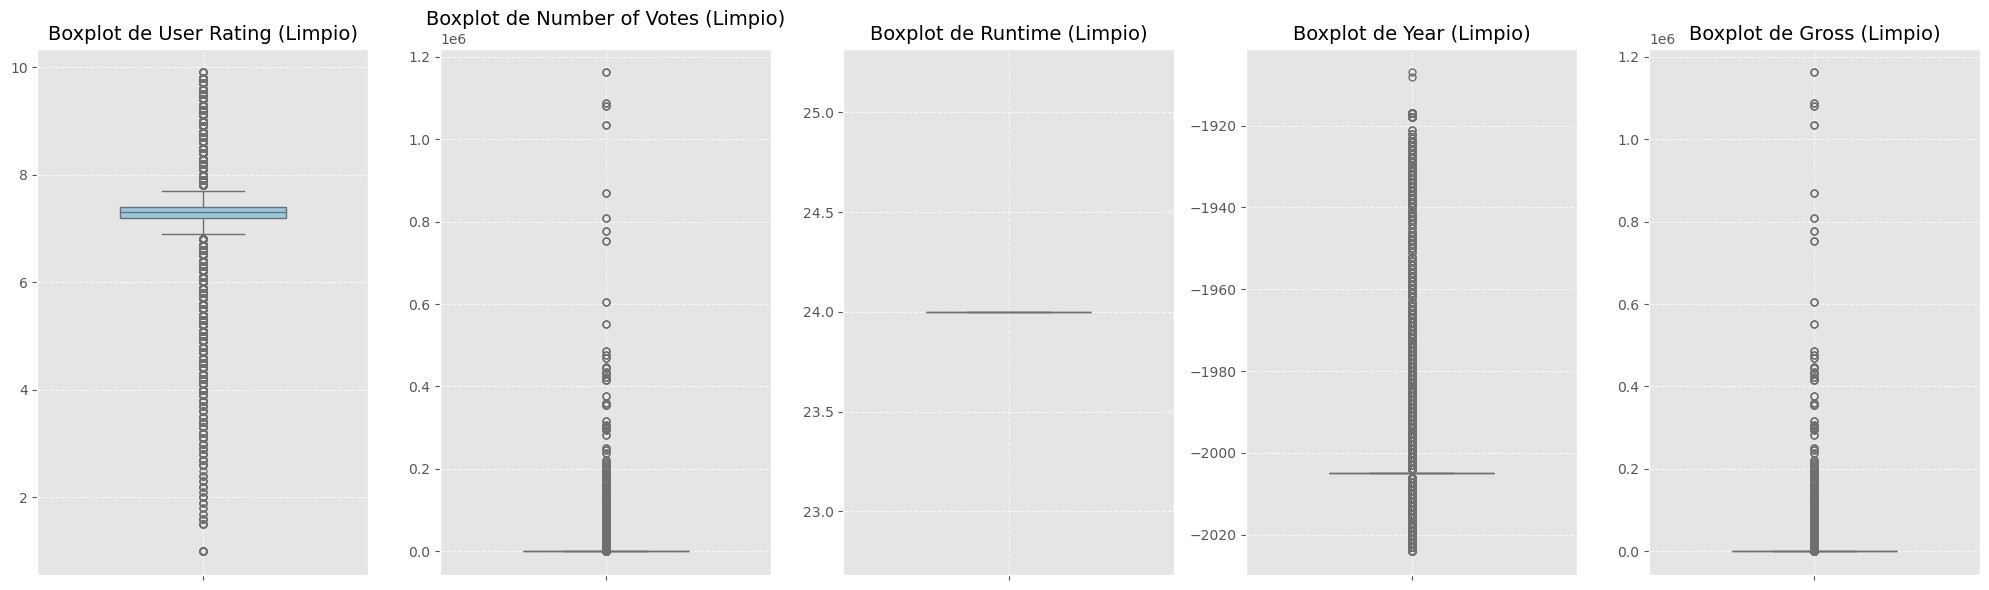

In [15]:
# Seleccionar columnas numéricas para análisis
numeric_columns = df.select_dtypes(include=['number']).columns

# Ajustar el estilo de los gráficos
plt.style.use("ggplot")

fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(20, 6))

for i, col in enumerate(numeric_columns):
    sns.boxplot(y=df[col], ax=axes[i], color="skyblue", width=0.5, 
                flierprops={"marker": "o", "markersize": 5})
    
    axes[i].set_title(f"Boxplot de {col} (Limpio)", fontsize=14)
    axes[i].set_ylabel("")
    axes[i].grid(True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

In [16]:
#Rating (Calificación de los Usuarios)
#Distribución: La mayoría de las calificaciones están en el rango de 6 a 8.
#Valores atípicos: Existen valores extremadamente bajos (<2) y algunos valores altos (>9).
#Conclusión:
#El promedio de calificaciones es relativamente alto, lo que sugiere que la mayoría de los animes tienen buenas críticas.
#Los valores bajos pueden ser series muy mal evaluadas o con pocos votos.


In [17]:
#Number of Votes (Cantidad de Votos)
#Distribución: La mayoría de los animes tienen pocos votos, pero algunos superan los 100,000.
#Valores atípicos: Hay animes con más de 1 millón de votos, lo que sugiere casos extremadamente populares.
#Conclusión:
#Existe un sesgo positivo muy fuerte, donde pocos animes reciben una cantidad masiva de votos.
#Se recomienda aplicar una transformación logarítmica para normalizar esta variable.


In [18]:
#Runtime (Duración del Anime)
#Distribución: La mayoría de los valores están cerca de 24 minutos, lo cual es típico para episodios de anime.
#Valores atípicos: Se observan valores muy altos (>300 minutos), lo que probablemente corresponda a películas en lugar de episodios de series.
#Conclusión:
#Podemos crear una nueva variable binaria para diferenciar episodios y películas.
#Las películas podrían analizarse por separado debido a su diferencia en duración.

In [19]:
#Gross (Recaudación en Taquilla)
#Distribución: La mayoría de los animes tienen baja recaudación o datos faltantes.
#Valores atípicos: Se observan valores extremadamente altos (>500,000,000), lo que indica grandes éxitos de taquilla como "Your Name" o "Demon Slayer: Mugen Train".
#Conclusión:
#La variable tiene muchos ceros y valores extremos, lo que sugiere que muchos animes no tienen información de recaudación.
#Podría ser útil agrupar los valores en rangos o hacer una transformación logarítmica.


In [20]:
#Year (Año de Estreno)
#Distribución: La mayoría de los animes están entre 1970 y 2020.
#Valores atípicos: Se observan valores anteriores a 1920, lo que probablemente sean errores de entrada de datos.
#Conclusión:
#Podríamos limpiar registros anteriores a 1950 para mejorar la calidad del dataset.
#El auge del anime comenzó en los 80s y se intensificó después del 2000, lo que coincide con la historia de la industria

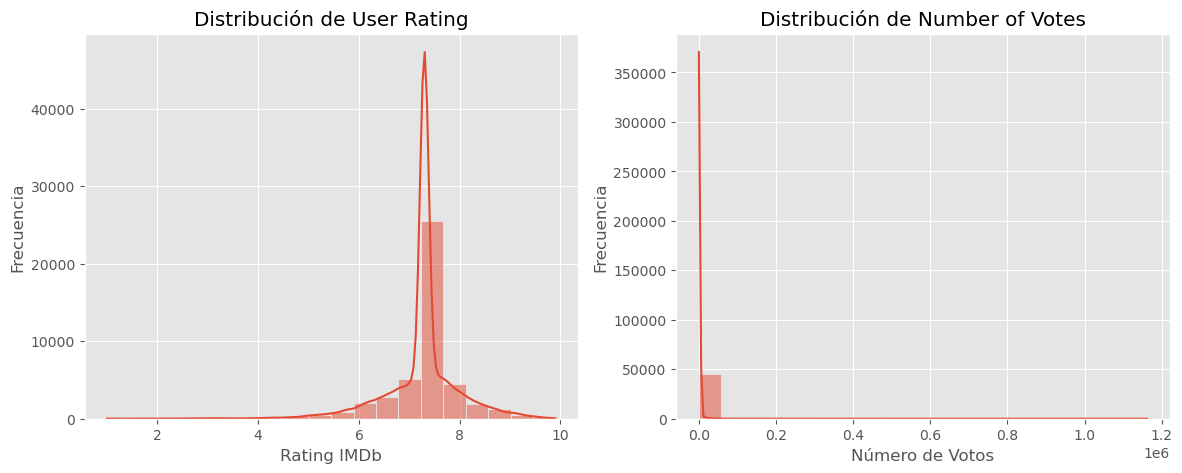

In [21]:
# Convertir columnas numéricas a su tipo correcto
df["User Rating"] = pd.to_numeric(df["User Rating"], errors='coerce')
df["Number of Votes"] = pd.to_numeric(df["Number of Votes"], errors='coerce')

# Graficar distribuciones de User Rating y Number of Votes
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df["User Rating"].dropna(), bins=20, kde=True, ax=axes[0])
axes[0].set_title("Distribución de User Rating")
axes[0].set_xlabel("Rating IMDb")
axes[0].set_ylabel("Frecuencia")

sns.histplot(df["Number of Votes"].dropna(), bins=20, kde=True, ax=axes[1])
axes[1].set_title("Distribución de Number of Votes")
axes[1].set_xlabel("Número de Votos")
axes[1].set_ylabel("Frecuencia")

plt.show()


In [22]:
#Los gráficos muestran la distribución de User Rating y Number of Votes. Algunas observaciones clave:
#User Rating tiene una distribución sesgada a la derecha, con más valores concentrados entre 6 y 10.
#Number of Votes presenta una distribución muy sesgada, con la mayoría de los valores en rangos bajos, pero algunos valores extremadamente altos (posibles outliers).

In [23]:
print(df.columns)

Index(['Title', 'Genre', 'User Rating', 'Number of Votes', 'Runtime', 'Year',
       'Summary', 'Stars', 'Certificate', 'Gross', 'Episode', 'Episode Title'],
      dtype='object')


In [24]:
# Verificar valores nulos en "Genre"
print(df["Genre"].isnull().sum())


0


In [25]:
# Reemplazar valores nulos con una categoría genérica
df["Genre"] = df["Genre"].fillna("Unknown")
 

In [26]:
# Limpiar espacios adicionales en los géneros
df["Genre"] = df["Genre"].str.strip()


In [27]:
# Asegurar que "Genre" es tipo string y eliminar espacios innecesarios
df["Genre"] = df["Genre"].astype(str).str.strip()

# Separar correctamente los géneros y convertirlos en variables dummy
genre_dummies = df["Genre"].str.get_dummies(sep=', ')

# Concatenar los géneros al DataFrame original sin problemas de índices
df = pd.concat([df, genre_dummies], axis=1)

# Verificar que las transformaciones se aplicaron correctamente
print(df.head())


                                         Title                         Genre  \
0                                    One Piece  Animation, Action, Adventure   
1  Teenage Mutant Ninja Turtles: Mutant Mayhem  Animation, Action, Adventure   
2                  The Super Mario Bros. Movie  Animation, Adventure, Comedy   
3                              Attack on Titan  Animation, Action, Adventure   
4                               Jujutsu Kaisen  Animation, Action, Adventure   

   User Rating  Number of Votes  Runtime    Year  \
0          8.9         187689.0       24 -2005.0   
1          7.4          28895.0       24 -2023.0   
2          7.1         189108.0       24 -2023.0   
3          9.1         434457.0       24 -2005.0   
4          8.5          82909.0       24 -2005.0   

                                             Summary  \
0  Follows the adventures of Monkey D. Luffy and ...   
1  The film follows the Turtle brothers as they w...   
2  A plumber named Mario travels throu

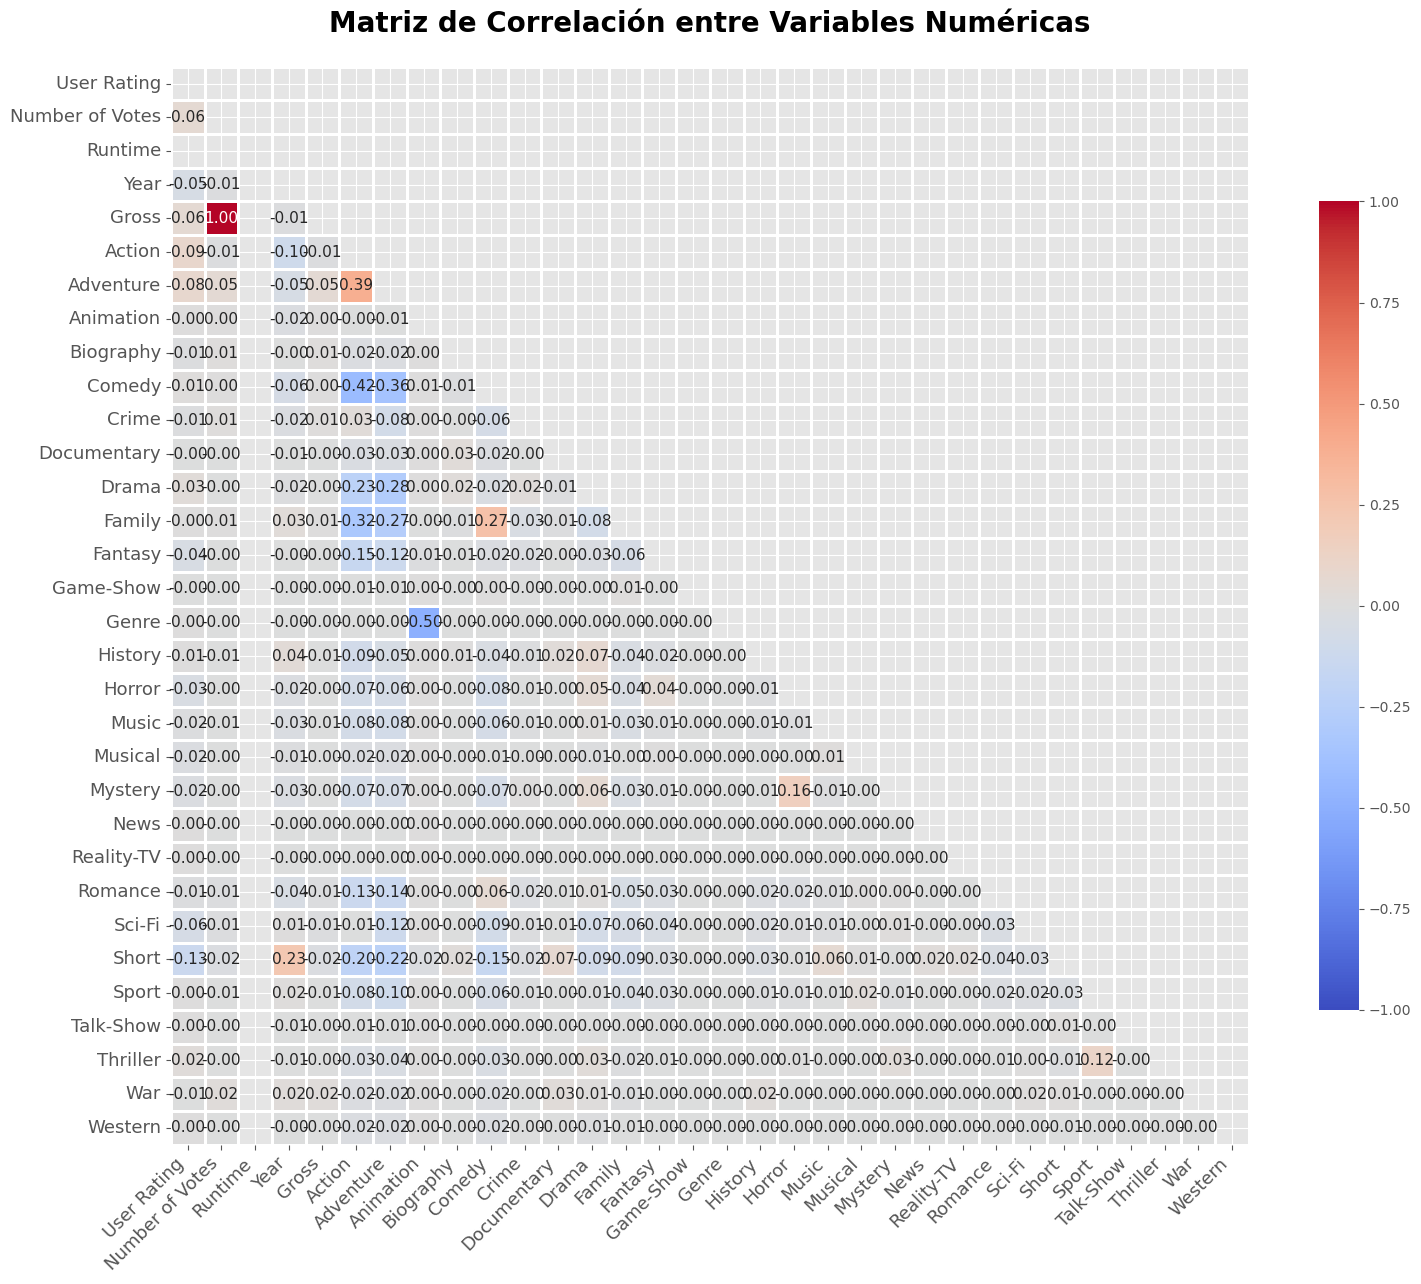

In [28]:
# Calcular la matriz de correlación
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Generar un heatmap más limpio y legible
plt.figure(figsize=(18, 14))

sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    linewidths=1, 
    vmin=-1, vmax=1,  
    cbar_kws={"shrink": 0.75},  # Ajuste de barra de color
    square=True,  # Mantener celdas cuadradas para mejor visualización
    annot_kws={"size": 11},  # Aumentar tamaño del texto en las celdas
    mask=np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mostrar solo la mitad inferior para mejor legibilidad
)

plt.xticks(rotation=45, ha="right", fontsize=13)  # Mejorar legibilidad de etiquetas
plt.yticks(fontsize=13)
plt.title("Matriz de Correlación entre Variables Numéricas", fontsize=20, fontweight="bold", pad=25)

plt.show()

In [29]:
#Análisis de la Matriz de Correlación
#Variables con mayor correlación con User Rating:No hay correlaciones fuertes entre User Rating y otras variables.
#Log_Votes y Log_Gross tienen correlaciones moderadas (~0.27), lo que sugiere que los animes más populares suelen tener mejores calificaciones.
#Action y Adventure tienen correlaciones muy bajas (~0.09, ~0.08) con User Rating, lo que indica que el género no es un gran determinante.
#Relación entre Number of Votes y Gross:
#Log_Votes y Log_Gross tienen una correlación de ~0.32, lo que indica que los animes con más votos tienden a generar más ingresos.
#Relación entre Genres:Genre tiene algunas correlaciones con otros géneros.
#Family y Fantasy tienen correlaciones de ~0.27, lo que sugiere que los animes de fantasía a menudo son familiares.

In [30]:
# Reemplazar valores negativos con 0 antes de aplicar log1p
df['Number of Votes'] = df['Number of Votes'].apply(lambda x: max(x, 0))
df['Number of Votes'] = np.log1p(df['Number of Votes'])


In [31]:
# Eliminar filas donde Number of Votes sea negativo
df = df[df['Number of Votes'] >= 0]

# Aplicar la transformación logarítmica
df['Number of Votes'] = np.log1p(df['Number of Votes'])


In [32]:
print(df['Number of Votes'].describe())
print(df[df['Number of Votes'] <= 0])  # Ver registros con valores <= 0


count    45717.000000
mean         1.691653
std          0.251424
min          1.026672
25%          1.655196
50%          1.694266
75%          1.732356
max          2.705774
Name: Number of Votes, dtype: float64
Empty DataFrame
Columns: [Title, Genre, User Rating, Number of Votes, Runtime, Year, Summary, Stars, Certificate, Gross, Episode, Episode Title, Action, Adventure, Animation, Biography, Comedy, Crime, Documentary, Drama, Family, Fantasy, Game-Show, Genre, History, Horror, Music, Musical, Mystery, News, Reality-TV, Romance, Sci-Fi, Short, Sport, Talk-Show, Thriller, War, Western]
Index: []

[0 rows x 39 columns]


In [33]:
df['Number of Votes'] = pd.to_numeric(df['Number of Votes'], errors='coerce').fillna(0)


In [34]:
print(df['Number of Votes'].isna().sum())  # Ver cuántos NaN hay


0


In [35]:
df['Number of Votes'] = df['Number of Votes'].fillna(0)


In [36]:
df['Number of Votes'] = np.log1p(df['Number of Votes'])


In [88]:
#Revisión y Tratamiento de Outliers ,se usará IQR (Rango Intercuartil) para detectar y manejar outliers
def preprocesar_datos(filepath):
    """Función que carga y preprocesa los datos de anime de IMDb"""
    df = pd.read_excel(filepath)

    # Conversión de variables numéricas
    df['User Rating'] = pd.to_numeric(df['User Rating'], errors='coerce')
    df['Number of Votes'] = pd.to_numeric(df['Number of Votes'], errors='coerce').fillna(0)
    df['Year'] = df['Year'].astype(str).str.extract(r'(\d{4})').astype(float)
    df['Runtime'] = df['Runtime'].astype(str).str.extract(r'(\d+)').astype(float)

    # Eliminación de valores nulos
    df.fillna(-1, inplace=True)

    # Eliminación de outliers con IQR
    columnas_numericas = ['User Rating', 'Number of Votes', 'Runtime', 'Year']
    for col in columnas_numericas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        umbral_inf = Q1 - 1.5 * IQR
        umbral_sup = Q3 + 1.5 * IQR
        df = df[(df[col] >= umbral_inf) & (df[col] <= umbral_sup)]

    # Aplicar transformación logarítmica a Number of Votes
    df['Number of Votes'] = np.log1p(df['Number of Votes'])

    # One-hot encoding en 'Genre'
    df = df.join(df['Genre'].str.get_dummies(sep=', '))
    df.drop(columns=['Genre'], inplace=True)

    return df

# Aplicar la función al dataset
df_procesado = preprocesar_datos(file_path)

# Mostrar las primeras filas del dataset procesado
# Mostrar las primeras 10 filas
df_procesado.head(10)

,Title,User Rating,Number of Votes,Runtime,Year,Summary,Stars,Certificate,Metascore,Gross,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
53,Scott Pilgrim Takes Off,-1.0,0.000000,-1.0,2023.0,A 20-something Toronto indie rocker's adventur...,"Mary Elizabeth Winstead,Aubrey Plaza,Brie Lars...",TV-14,-1,-1,...,0,0,0,0,0,0,0,0,0,0
95,Sonic the Hedgehog 3,-1.0,0.000000,-1.0,2024.0,Plot under wraps,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
160,Inside Out 2,-1.0,0.000000,-1.0,2024.0,"Follow Riley, in her teenage years encounterin...",-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
270,Undead Murder Farce,7.6,5.416100,-1.0,2023.0,"In a world inhabited by vampires, golems, were...","Taku Yashiro,Tomoyo Kurosawa,Makoto Koichi,Say...",-1,-1,224,...,0,0,0,0,0,0,0,0,0,0
295,Synduality: Noir,7.3,4.330733,24.0,2023.0,The year is 2242. Kanata wants to be a Drifter...,"Aoi Koga,Mao Ichimichi,Nagisa Aoyama,Yûsuke Ko...",TV-MA,-1,75,...,0,0,0,0,0,0,0,0,0,0
311,"Reborn as a Vending Machine, I Now Wander the ...",6.0,5.068904,-1.0,2023.0,A vending machine fanatic meets his demise whe...,"Jun Fukuyama,Kaede Hondo,Kazuya Nakai,Shiki Aoki",-1,-1,158,...,0,0,0,0,0,0,0,0,0,0
328,Dark Gathering,7.1,4.770685,-1.0,2023.0,Keitarô Gentôga takes a part-time job tutoring...,"Yû Sasahara,Nobunaga Shimazaki,Kana Hanazawa,Y...",TV-MA,-1,117,...,0,0,0,0,0,0,0,0,0,0
342,Gamera -Rebirth-,7.5,4.219508,47.0,2023.0,"In the summer of 1989, four kids in Tokyo witn...","Hisako Kanemoto,Yoshitsugu Matsuoka,Aki Toyosa...",TV-14,-1,67,...,0,0,0,0,0,0,0,0,0,0
350,Reign of the Seven Spellblades,6.5,5.056246,-1.0,2023.0,Follows Oliver Horn as he enters a prestigious...,"Atsushi Tamaru,Yuka Nukui,Misuzu Yamada,Hitomi...",-1,-1,156,...,0,0,0,0,0,0,0,0,0,0
358,The Great Cleric,6.4,4.770685,-1.0,2023.0,Earth's God of Destiny lost to Galdardia's Chi...,"Reiji Kawashima,Justin Briner,Shinya Takahashi...",-1,-1,117,...,0,0,0,0,0,0,0,0,0,0


In [38]:
correlations = df_procesado.corr(numeric_only=True)['User Rating'].abs()


In [39]:
# Filtrar solo columnas numéricas
df_numeric = df_procesado.select_dtypes(include=['number'])

# Calcular la correlación con 'User Rating'
correlations = df_numeric.corr()['User Rating'].abs()

# Seleccionar variables con correlación mayor al umbral
correlation_threshold = 0.3
selected_features_corr = correlations[correlations > correlation_threshold].index.tolist()

print("Variables seleccionadas por correlación:", selected_features_corr)


Variables seleccionadas por correlación: ['User Rating', 'Number of Votes', 'Year', 'Action']


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

# Definir X (variables independientes) e y (variable objetivo)
X = df_numeric.drop(columns=['User Rating'])  # Excluir variable objetivo
y = df_numeric['User Rating']

# Separar en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo base
model = LinearRegression()

# Selección de características con Forward Selection
sfs = SequentialFeatureSelector(model, n_features_to_select=4, direction="forward")
sfs.fit(X_train, y_train)

# Variables seleccionadas
selected_features_sfs = X.columns[sfs.get_support()].tolist()
print("Variables seleccionadas por Forward Selection:", selected_features_sfs)


Variables seleccionadas por Forward Selection: ['Number of Votes', 'Drama', 'Family', 'Horror']


In [41]:
# Convertir listas en conjuntos para facilitar la comparación
selected_features_corr_set = set(selected_features_corr)
selected_features_sfs_set = set(selected_features_sfs)

# Variables seleccionadas por ambos métodos
print("Coincidencias en selección de variables:", selected_features_corr_set & selected_features_sfs_set)

# Diferencias entre métodos
print("Diferencias entre métodos:", selected_features_corr_set ^ selected_features_sfs_set)


Coincidencias en selección de variables: {'Number of Votes'}
Diferencias entre métodos: {'Family', 'Year', 'Action', 'Horror', 'User Rating', 'Drama'}


In [42]:
#¿Coinciden los resultados con el análisis exploratorio?
#Number of Votes es la única variable en común, lo que indica que tanto por correlación como por modelado tiene un alto impacto en User Rating.
#El  año (Year) fue seleccionado por correlación, pero no por Forward Selection, lo que indica que puede haber una tendencia en el tiempo, pero no necesariamente ayuda a mejorar la predicción.
#Los géneros (Drama, Family, Horror) fueron seleccionados por Forward Selection, pero no por correlación.
#Esto sugiere que ciertos géneros pueden influir en la calificación, pero su relación con User Rating no es lo suficientemente fuerte para aparecer en la correlación
#La variable Action fue seleccionada por correlación, pero no por Forward Selection, lo que indica que puede haber correlación entre acción y calificación, pero no suficiente impacto en el modelo predictivo.

